Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statannotations.Annotator import Annotator

Data loading

In [5]:
df = pd.read_csv('WB_data_for_plotting.csv')

Plotting

c:\Users\JohannesWilbertz\anaconda3\envs\tools\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SNCA-3x vs. SNCA-3x + Prostratin: Welch's t-test independent samples, P_val:6.104e-01 t=7.020e-01
SNCA-3x vs. SNCA-3x + Tyr A9 (0.3 uM): Welch's t-test independent samples, P_val:1.590e-02 t=7.836e+00
SNCA-3x vs. SNCA-3x + Tyr A9 (2.5 uM): Welch's t-test independent samples, P_val:2.501e-03 t=1.996e+01


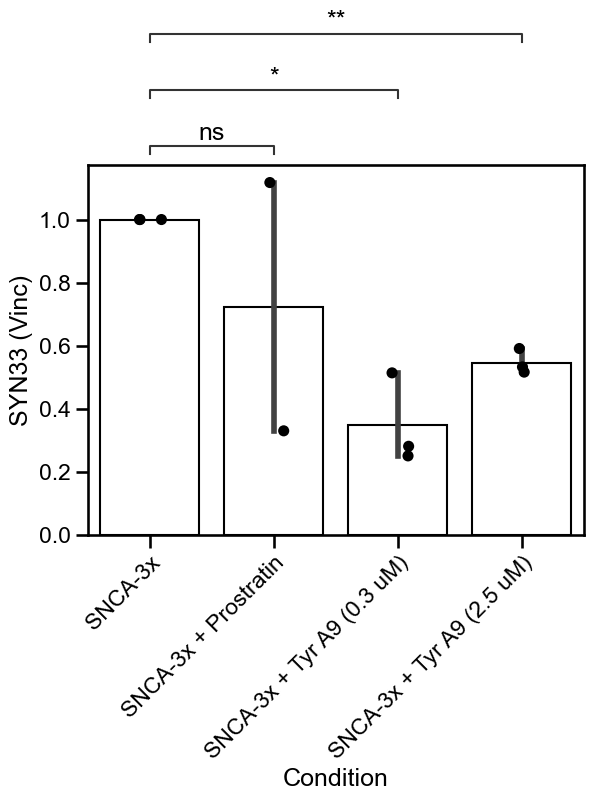

In [7]:
data = df
x = 'Condition'
y = 'SYN33 (Vinc)' 


# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Plot data points
ax = sns.stripplot(data=data, x=x, y=y, s=8, color='black')

# Overlay bar graph
ax = sns.barplot(data=data, x=x, y=y, color='white', edgecolor="0")

# Rotate x-axis labels and align them with ticks
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Add statistical annotation on top of figure
stat_pairs=[('SNCA-3x', 'SNCA-3x + Tyr A9 (0.3 uM)'),
            ('SNCA-3x', 'SNCA-3x + Tyr A9 (2.5 uM)'),
            ('SNCA-3x', 'SNCA-3x + Prostratin'),
            ]

annot = Annotator(ax, stat_pairs, data=data, x=x, y=y)
annot.configure(test='t-test_welch', verbose=2, loc='outside') # t-test_welch
annot.apply_test()
annot.annotate()

# Save plot as PDF
plt.savefig('WB' + '.pdf', bbox_inches='tight')

# Show the plot
plt.show()